In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG-DIR'] = '/content/drive'

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
!kaggle datasets download -d bhavikjikadara/handwritten-digit-recognition

 46% 7.00M/15.3M [00:00<00:00, 71.6MB/s]
100% 15.3M/15.3M [00:00<00:00, 107MB/s] 


In [ ]:
!unzip /content/handwritten-digit-recognition.zip && rm /content/handwritten-digit-recognition.zip

Archive:  /content/handwritten-digit-recognition.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df_train.info(), df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [ ]:
df_test.info(), df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

# spliting dataset into features (input) and labels (output)

In [ ]:
X = df_train.iloc[:, 1:785]
# This line selects all rows (':') and all columns from the 1st column to the 784th column (1:785).
# It means it selects all the pixel values/features from column index 1 to 784.
# The iloc function in pandas is used for integer-location based indexing.
# which allows you to select specific rows and columns by their integer index.

y = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

# Splitting dataset into training and testing

The parameters passed to train_test_split are:

*   X: The input features (independent variables).
*   y: The target variable (dependent variable or labels).


test_size: This parameter specifies the proportion of the dataset to include in the validation split.

In this case, test_size=0.2 means that 20% of the data will be used for validation, and the remaining 80% will be used for training.

random_state: This parameter sets the random seed for reproducibility. It ensures that the dataset is split in the same way each time you run the code, which is useful for obtaining consistent results.

After calling train_test_split, it returns four variables:

X_train: The features of the training set.
X_val: The features of the validation set.
y_train: The labels of the training set.
y_val: The labels of the validation set.

These variables contain the split datasets, allowing you to train your machine learning model on the training set and evaluate its performance on the validation set.

In [ ]:
from sklearn.model_selection import train_test_split
# module commonly used for splitting datasets into training and validation sets.

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1212)
# train_test_split splits the dataset into training and validation sets based on the input features (X) and labels (y).

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_val.shape)
print('y_validation:', y_val.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


# Converting training, testing, and validation data into array

These lines of code are necessary if you're using a convolutional neural network (CNN) model in TensorFlow or a similar library that expects input data to be in the form of multi-dimensional arrays (tensors). CNNs typically expect input data to be in the shape (batch_size, height, width, channels), where batch_size is the number of samples in each batch, height and width are the dimensions of the input images, and channels represents the number of color channels (e.g., 1 for grayscale, 3 for RGB).

In [ ]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
# converts the DataFrame X_train to a NumPy array. This is necessary because the reshape operation works with NumPy arrays.
# then, reshapes the NumPy array into a new shape of (33600, 28, 28). This means that each sample in the training data now has a shape of (28, 28).

y_train_re = y_train.values
x_validation_re = X_val.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_val.values
x_test_re = df_test.to_numpy().reshape(28000, 28, 28)

In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


# Visualization




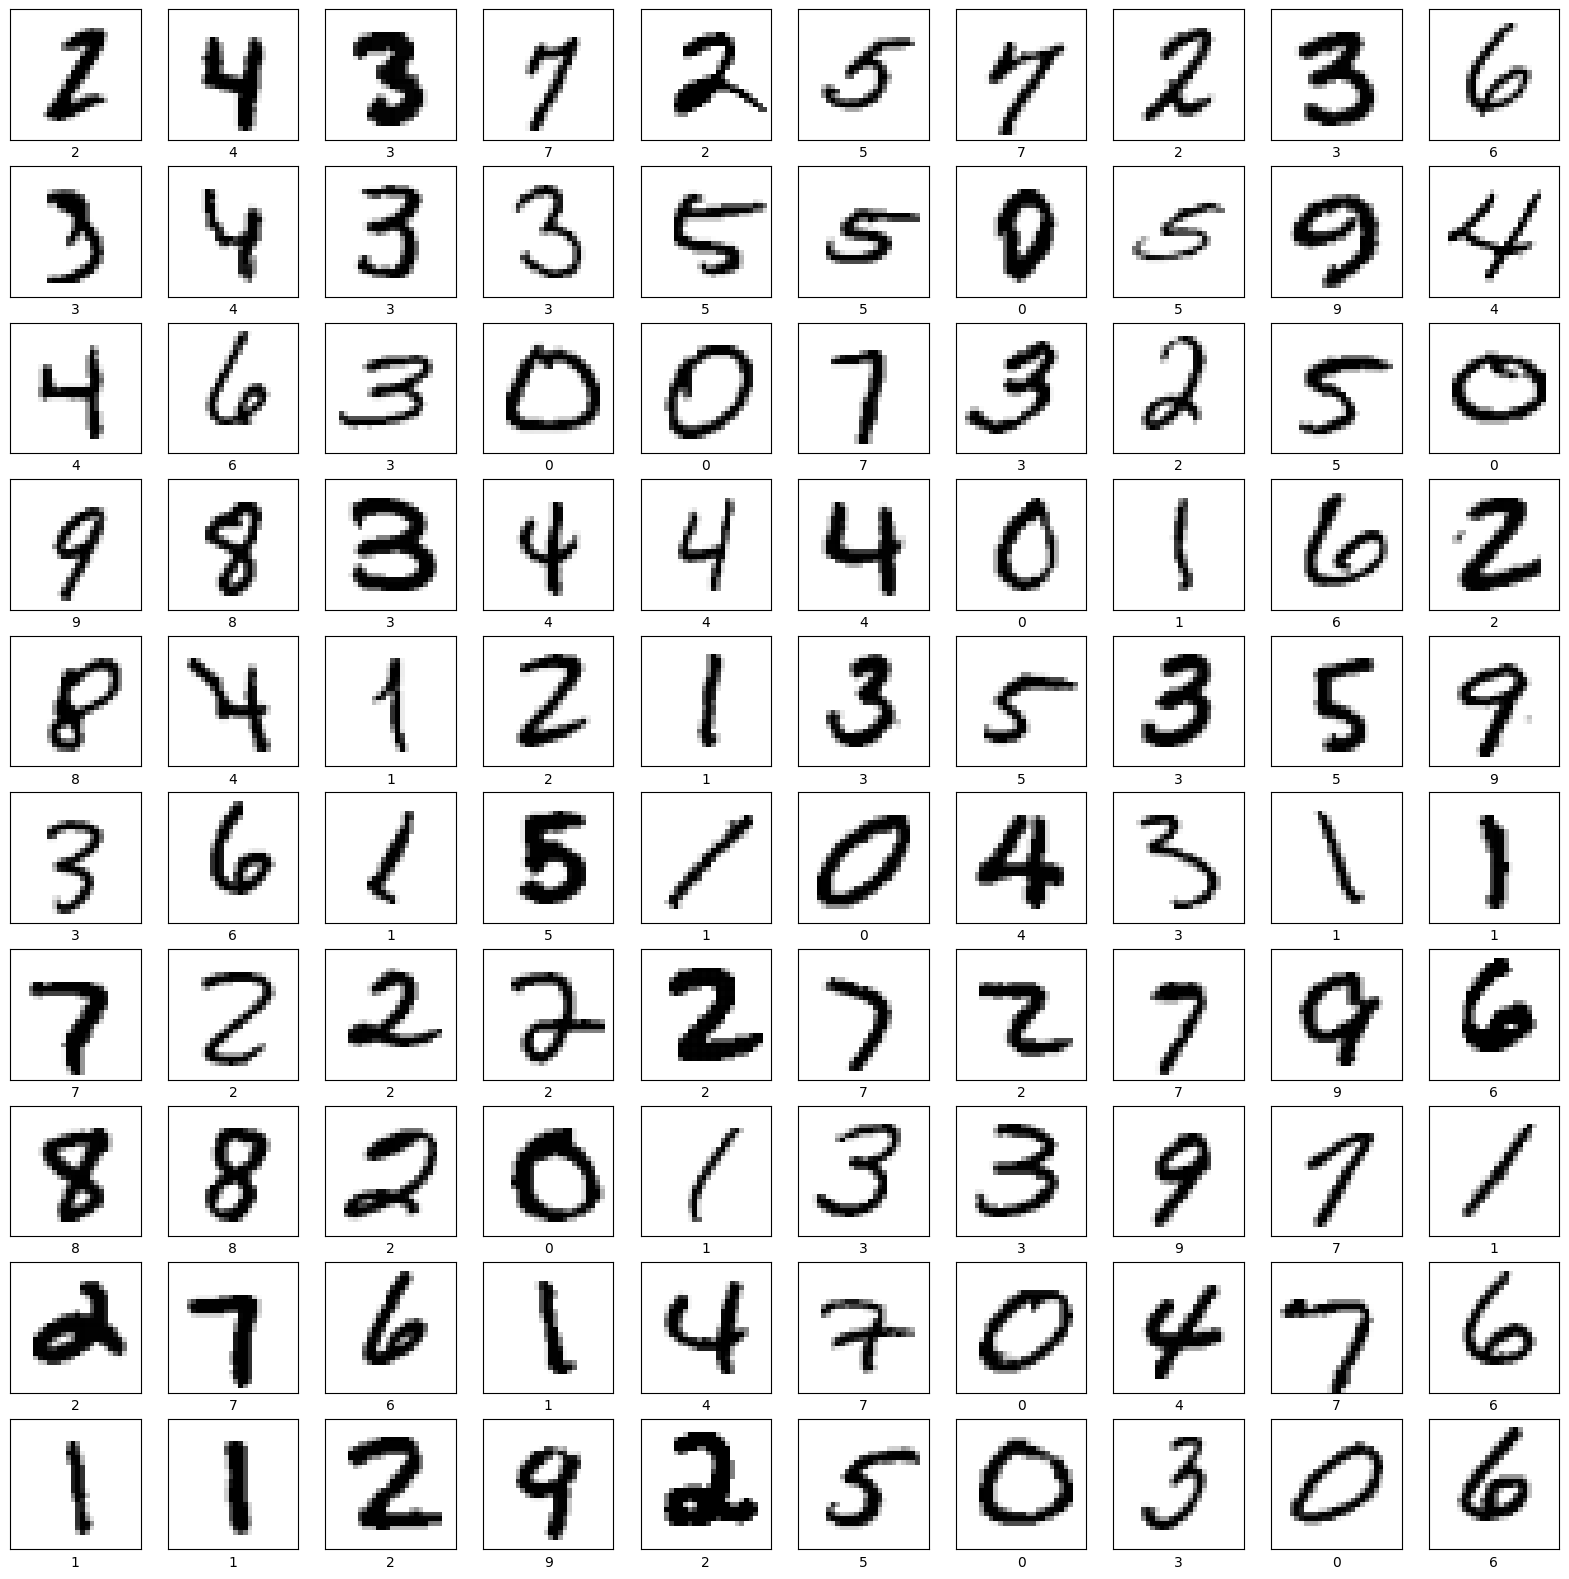

In [ ]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255
# Normalize train, test, and validation dataset

In [ ]:
from keras.models import Sequential # Sequential model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # all layers
from keras.activations import softmax, relu # activation function
from keras.initializers import VarianceScaling # Layer weight initializers

# Model 1

In [ ]:
model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    MaxPooling2D(2,2),
    Conv2D(8, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

model.compile(optimizer=Adam(), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=15,
    validation_data=(x_validation_normalized, y_validation_re)
)

print("The model has successfully trained")

Epoch 1/15
1050/1050 [==============================] - 31s 28ms/step - loss: 0.3175 - accuracy: 0.9024 - val_loss: 0.1104 - val_accuracy: 0.9681
Epoch 2/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.1147 - accuracy: 0.9642 - val_loss: 0.0832 - val_accuracy: 0.9740
Epoch 3/15
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0867 - accuracy: 0.9740 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 4/15
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0681 - accuracy: 0.9783 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 5/15
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0598 - accuracy: 0.9815 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 6/15
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0574 - val_accuracy: 0.9832
Epoch 7/15
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.0493 -

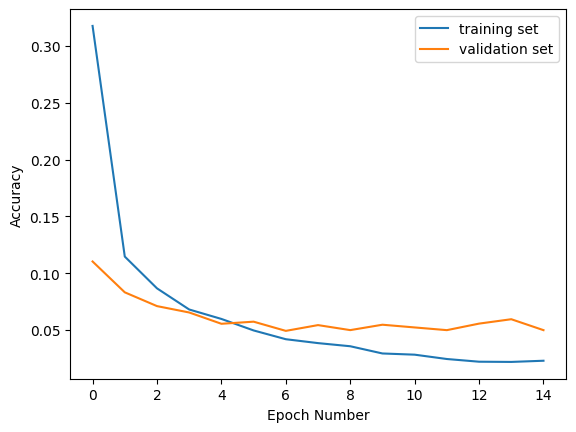

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

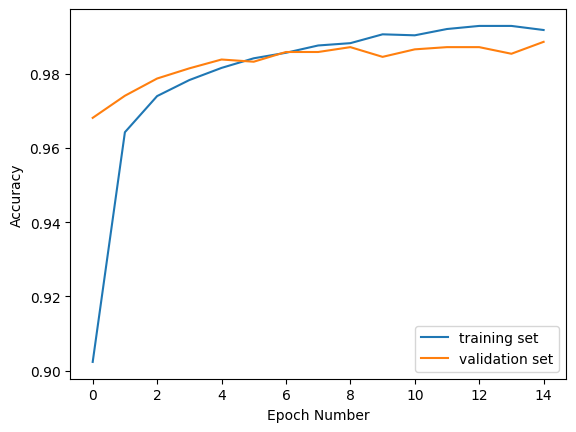

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# Testing model 1 on train and test dataset

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

print('Train loss: ', round(train_loss,2)*100, '%')
print('Train accuracy: ', round(train_accuracy, 2)*100, '%')

test_loss, test_accuracy = model.evaluate(x_validation_normalized, y_validation_re)
print('test loss: ', round(test_loss, 2)*100, '%')
print('test accuracy: ', round(test_accuracy,2)*100, '%')

1050/1050 [==============================] - 9s 8ms/step - loss: 0.0079 - accuracy: 0.9979
Train loss:  1.0 %
Train accuracy:  100.0 %
263/263 [==============================] - 1s 5ms/step - loss: 0.0500 - accuracy: 0.9886
test loss:  5.0 %
test accuracy:  99.0 %


# Model 2

In [ ]:
model = Sequential([
    Conv2D(8, (3,3), activation='relu', strides=1 , input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(8, (3,3), activation='relu', strides=1),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 8)         584       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=Adam(), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=15,
    validation_data=(x_validation_normalized, y_validation_re)
)

print("The model has successfully trained")

Epoch 1/15
1050/1050 [==============================] - 19s 16ms/step - loss: 0.3549 - accuracy: 0.8886 - val_loss: 0.1151 - val_accuracy: 0.9645
Epoch 2/15
1050/1050 [==============================] - 14s 14ms/step - loss: 0.1124 - accuracy: 0.9655 - val_loss: 0.0792 - val_accuracy: 0.9746
Epoch 3/15
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0841 - accuracy: 0.9738 - val_loss: 0.0851 - val_accuracy: 0.9736
Epoch 4/15
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0649 - val_accuracy: 0.9789
Epoch 5/15
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0584 - accuracy: 0.9808 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 6/15
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0611 - val_accuracy: 0.9821
Epoch 7/15
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0572 -

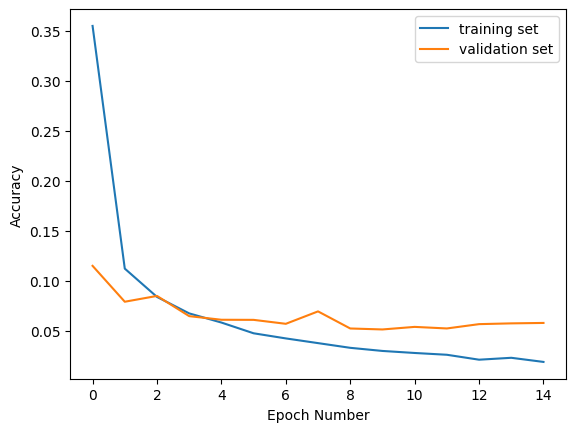

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

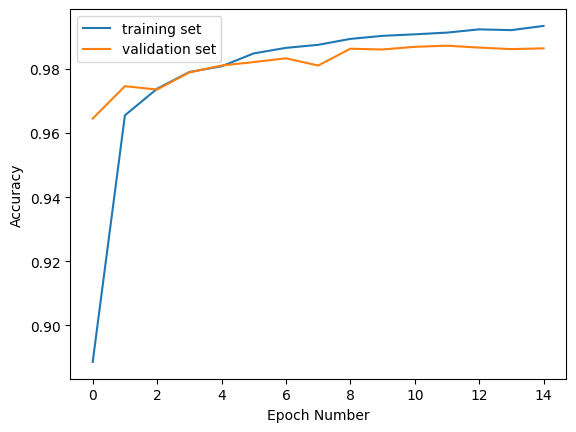

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

print('Train loss: ', round(train_loss,2)*100, '%')
print('Train accuracy: ', round(train_accuracy, 2)*100, '%')

test_loss, test_accuracy = model.evaluate(x_validation_normalized, y_validation_re)
print('test loss: ', round(test_loss, 2)*100, '%')
print('test accuracy: ', round(test_accuracy,2)*100, '%')

1050/1050 [==============================] - 8s 7ms/step - loss: 0.0106 - accuracy: 0.9966
Train loss:  1.0 %
Train accuracy:  100.0 %
263/263 [==============================] - 1s 5ms/step - loss: 0.0581 - accuracy: 0.9864
test loss:  6.0 %
test accuracy:  99.0 %
